In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
## Pré-processamento dos dados

In [119]:
### 1. Obtendo dados

In [120]:
# FONTE: https://www.kaggle.com/arjunbhasin2013/ccdata
dfCC = pd.read_csv('CC_DATASET.csv')

In [121]:
dfCC.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [122]:
### 2. Tratamento dos outliers

In [123]:
# TEMOS ALGUNS VALORES EXTREMOS NO DF
dfCC['PURCHASES'].max()

1000000000.0

In [124]:
## O bloco abaixo implementa um loop sobre todas as colunas do df e substitui os outliers superiores e inferiores pela média dos não ouliers, na fração de 0,1%.

In [125]:
# vasculhar as features procurando valores extremos e substituir por medios não extremos

In [126]:
for i in dfCC.drop(['CUST_ID'],axis=1):
    
    dfCC[i] = np.where(dfCC[i] <= dfCC[i].quantile(0.001),
                               
                                  dfCC[(dfCC[i] > dfCC[i].quantile(0.001)) & 
                                                (dfCC[i] < dfCC[i].quantile(0.999))][i].mean(),
                              
                                  dfCC[i])
    
    dfCC[i] = np.where(dfCC[i] >= dfCC[i].quantile(0.999),
                               
                                  dfCC[(dfCC[i] > dfCC[i].quantile(0.001)) & 
                                                (dfCC[i] < dfCC[i].quantile(0.999))][i].mean(),
                              
                                  dfCC[i])

In [127]:
# PÓS TRATAMENTO
dfCC['PURCHASES'].max()

27790.42

In [128]:
### 3. Tratamento de valores ausentes

In [129]:
dfCC.fillna(value = 0, inplace = True)
dfCC.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.400000,1083.698336,95.400000,1974.557102,0.166667,0.319414,0.083333,0.273956,6.533272,2.000000,1000.0,201.802084,139.509787,0.346911,9.712983
1,C10002,3202.467416,0.909091,1258.407048,1083.698336,706.614394,6442.945483,0.467464,0.319414,0.521251,0.250000,4.000000,18.687545,7000.0,4103.032597,1072.340217,0.222222,9.712983
2,C10003,2495.148862,0.630180,773.170000,773.170000,706.614394,1974.557102,0.510131,0.354802,0.521251,0.273956,6.533272,12.000000,7500.0,622.066742,627.284787,0.346911,9.712983
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,706.614394,205.788017,0.083333,0.083333,0.521251,0.083333,1.000000,1.000000,7500.0,1741.734864,0.000000,0.346911,9.712983
4,C10005,817.714335,0.630180,16.000000,16.000000,706.614394,1974.557102,0.083333,0.083333,0.521251,0.273956,6.533272,1.000000,1200.0,678.334763,244.791237,0.346911,9.712983


In [130]:
### 4. Normalização

In [131]:
# INSTANCIANDO UM OBJETO ESTANDARIZADOR
from sklearn.preprocessing import StandardScaler
estandCC = StandardScaler()

In [132]:
# TREINANDO O ESTANDARIZADOR A PARTIR DOS DADOS DE CARTÕES
# A PRIMEIRA COLUNA (CUST_ID) NÃO FAZ PARTE DAS MÉTRICAS, VAMOS EXCLUÍ-LA DO FIT
estandCC.fit(dfCC.drop(['CUST_ID'],axis=1))

StandardScaler()

In [133]:
# A PARTIR DO OBJETO TREINADO, VAMOS TRANSFORMAR NOSSOS DADOS DE SEGURO AUTO EM DADOS NORMALIZADOS
valEstandCC = estandCC.transform(dfCC.drop(['CUST_ID'],axis=1))

In [134]:
# POR PADRÃO O RESULTADO PROCESSADO (TRANSFORMADO) POR StandardScaler É ENCAPSULADO EM UM OBJETO DO TIPO ARRAY (NUMPY)
# VAMOS CRIAR UM DF QUE A PARTIR DO ARRAY, INCLUINDO OS NOMES ORIGINAIS DAS COLUNAS
dfCCEstand = pd.DataFrame(valEstandCC, columns = dfCC.drop(['CUST_ID'],axis=1).columns)
dfCCEstand.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.753098,1.404516,-6.614830e-01,-8.920205e-07,-0.871131,-0.000001,-1.499869,-0.011206,-2.558003,-0.000672,-0.000120,-0.770635,-0.972045,-5.894687e-01,-0.372079,-0.005354,0.105134
1,0.810600,2.069397,-7.250268e-07,-8.920205e-07,-0.000001,2.731064,-0.050046,-0.011206,-0.014166,-0.177932,-0.496195,-0.000066,0.704750,9.038761e-01,0.163559,-0.881595,0.105134
2,0.460763,0.029525,-2.759885e-01,-2.522672e-01,-0.000001,-0.000001,0.155607,0.197310,-0.014166,-0.000672,-0.000120,-0.308872,0.844483,-4.285964e-01,-0.091995,-0.005354,0.105134
3,0.051001,0.074753,1.368411e-01,3.373810e-01,-0.000001,-1.081068,-1.901534,-1.402257,-0.014166,-1.411148,-1.083667,-0.816811,0.844483,-6.738633e-07,-0.452186,-0.005354,0.105134
4,-0.368889,0.029525,-7.066432e-01,-8.673753e-01,-0.000001,-0.000001,-1.901534,-1.402257,-0.014166,-0.000672,-0.000120,-0.816811,-0.916152,-4.070576e-01,-0.311626,-0.005354,0.105134


In [135]:
## Modelagem

In [136]:
### Clusterização sobre dados normalizados

In [137]:
# IMPORTANDO O K-MEANS DO SKLEARN
from sklearn.cluster import KMeans

In [138]:
# DEINIMOS EM K A QUANTIDADE DE GRUPOS QUE QUEREMOS "DIVIDIR OS DADOS"
k2 = 2

# INSTANCIANDO O OBJETO K-MEANS, COMO SERÃO DUAS CLUSTERIZAÇÕES, VAMOS DEFINIR K2 E K3
modeloKM_k2 = KMeans(n_clusters = k2)

# FITANDO O MODELO USANDO OS DADOS NORMALIZADOS (dfCCEstand)
modeloKM_k2.fit(X = dfCCEstand)

# ADICIONANDO AO DF OS CLUSTERS, A PARTIR DA PROPRIEDADE LABELS DO OBJETO KMEANS modeloKM_k2
dfCC['CLUSTER_K2'] = pd.DataFrame(modeloKM_k2.labels_).values

In [139]:
dfCC.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER_K2
0,C10001,40.900749,0.818182,95.400000,1083.698336,95.400000,1974.557102,0.166667,0.319414,0.083333,0.273956,6.533272,2.000000,1000.0,201.802084,139.509787,0.346911,9.712983,1
1,C10002,3202.467416,0.909091,1258.407048,1083.698336,706.614394,6442.945483,0.467464,0.319414,0.521251,0.250000,4.000000,18.687545,7000.0,4103.032597,1072.340217,0.222222,9.712983,0
2,C10003,2495.148862,0.630180,773.170000,773.170000,706.614394,1974.557102,0.510131,0.354802,0.521251,0.273956,6.533272,12.000000,7500.0,622.066742,627.284787,0.346911,9.712983,1
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,706.614394,205.788017,0.083333,0.083333,0.521251,0.083333,1.000000,1.000000,7500.0,1741.734864,0.000000,0.346911,9.712983,1
4,C10005,817.714335,0.630180,16.000000,16.000000,706.614394,1974.557102,0.083333,0.083333,0.521251,0.273956,6.533272,1.000000,1200.0,678.334763,244.791237,0.346911,9.712983,1


In [140]:
# VAMOS REPETIR OS MESMOS PASSOS PARA A CLUSTERIZAÇÃO DE TRÊS GRUPOS...
k3 = 3
modeloKM_k3 = KMeans(n_clusters = k3)
modeloKM_k3.fit(X = dfCCEstand)
dfCC['CLUSTER_K3'] = pd.DataFrame(modeloKM_k3.labels_).values

In [141]:
dfCC.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER_K2,CLUSTER_K3
0,C10001,40.900749,0.818182,95.400000,1083.698336,95.400000,1974.557102,0.166667,0.319414,0.083333,0.273956,6.533272,2.000000,1000.0,201.802084,139.509787,0.346911,9.712983,1,0
1,C10002,3202.467416,0.909091,1258.407048,1083.698336,706.614394,6442.945483,0.467464,0.319414,0.521251,0.250000,4.000000,18.687545,7000.0,4103.032597,1072.340217,0.222222,9.712983,0,2
2,C10003,2495.148862,0.630180,773.170000,773.170000,706.614394,1974.557102,0.510131,0.354802,0.521251,0.273956,6.533272,12.000000,7500.0,622.066742,627.284787,0.346911,9.712983,1,0
3,C10004,1666.670542,0.636364,1499.000000,1499.000000,706.614394,205.788017,0.083333,0.083333,0.521251,0.083333,1.000000,1.000000,7500.0,1741.734864,0.000000,0.346911,9.712983,1,0
4,C10005,817.714335,0.630180,16.000000,16.000000,706.614394,1974.557102,0.083333,0.083333,0.521251,0.273956,6.533272,1.000000,1200.0,678.334763,244.791237,0.346911,9.712983,1,0


In [ ]:
## Análise de dados

In [ ]:
#### 1. Escolha duas métricas e plote um gráfico de dispersão, separando por cor os pontos da clusterização k=2.

<Figure size 2000x1000 with 0 Axes>

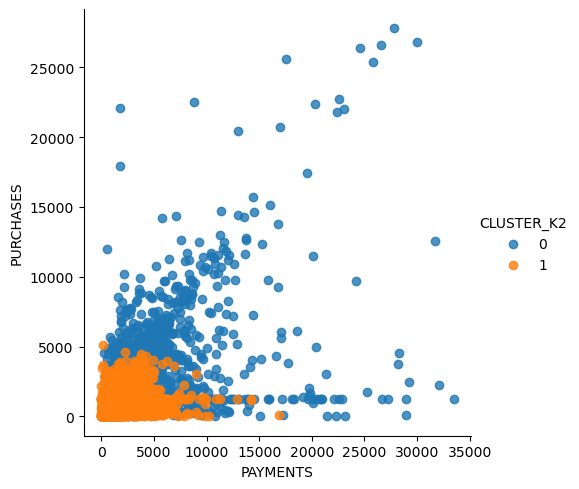

In [142]:
# PLOTANDO 
plt.figure(figsize=(20, 10))
sns.lmplot(x = 'PAYMENTS',y = 'PURCHASES', data = dfCC, hue = 'CLUSTER_K2', fit_reg=False)

In [ ]:
#### 2. Repita o gráfico da questão anterior para k3. Visualmente qual a clusterização ficou melhor?

<Figure size 1500x800 with 0 Axes>

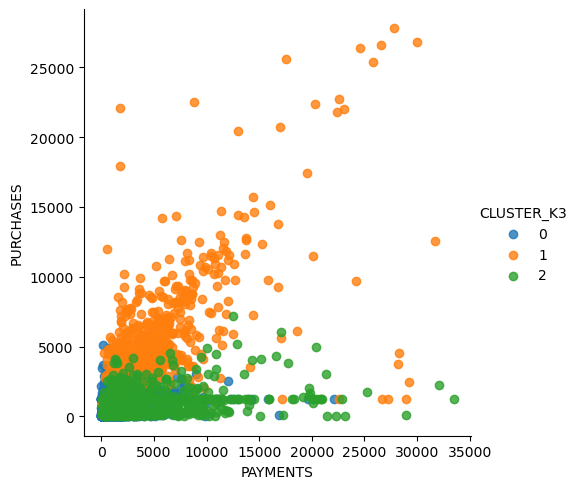

In [143]:
plt.figure(figsize=(15, 8))
sns.lmplot(x = 'PAYMENTS',y = 'PURCHASES', data = dfCC, hue = 'CLUSTER_K3', fit_reg=False)

In [ ]:
## A clusterização k=3 aparentemente separa melhor os casos

In [ ]:
#### 3. Quantos casos ficaram enquadrados em cada cluster em cada uma das clusterizações?

In [144]:
print(dfCC.groupby('CLUSTER_K2')['CUST_ID'].count())
print('')
print(dfCC.groupby('CLUSTER_K3')['CUST_ID'].count())

CLUSTER_K2
0    1573
1    7377
Name: CUST_ID, dtype: int64

CLUSTER_K3
0    7327
1     627
2     996
Name: CUST_ID, dtype: int64


In [ ]:
#### 4. Qual a média e a mediana de valor de compras, de cada cluster em cada uma das clusterizações?

In [145]:
print('MÉDIA')
print(dfCC.groupby('CLUSTER_K2')['PURCHASES'].mean())
print('MEDIANA')
print(dfCC.groupby('CLUSTER_K2')['PURCHASES'].median())
print('')
print('MÉDIA')
print(dfCC.groupby('CLUSTER_K3')['PURCHASES'].mean())
print('MEDIANA')
print(dfCC.groupby('CLUSTER_K3')['PURCHASES'].median())

MÉDIA
CLUSTER_K2
0    3195.008888
1     845.466383
Name: PURCHASES, dtype: float64
MEDIANA
CLUSTER_K2
0    2128.56
1     744.09
Name: PURCHASES, dtype: float64

MÉDIA
CLUSTER_K3
0     890.471247
1    5799.614482
2    1106.338734
Name: PURCHASES, dtype: float64
MEDIANA
CLUSTER_K3
0     789.960000
1    4689.030000
2    1258.407048
Name: PURCHASES, dtype: float64


In [ ]:
#### 5. Usando a clusterização k=3, qual a mediana de limite de crédito de cada grupo?

In [146]:
dfCC.groupby('CLUSTER_K3')['CREDIT_LIMIT'].median()

CLUSTER_K3
0    2850.0
1    7500.0
2    7500.0
Name: CREDIT_LIMIT, dtype: float64